<a href="https://colab.research.google.com/github/SarahSouzaPontes/nutricional/blob/main/Planilha_Personalizada_Nutricional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qual é o nome da pessoa? Sarah Pontes
Quantos dias quer adicionar (apenas o número)! 2
Entrada 1:
Data (YYYY-MM-DD): 2020-10-01
Peso Corporal: (exemplo: 60.40) 70.00
Altura (exemplo: 1.70): 1.70
Meta de Passos: 100
Calorias Diárias: 20
Proteínas: 10
Carboidratos: 20
Gorduras: 10
Entrada 2:
Data (YYYY-MM-DD): 2020-10-02
Peso Corporal: (exemplo: 60.40) 65.00
Altura (exemplo: 1.70): 1.70
Meta de Passos: 200
Calorias Diárias: 10
Proteínas: 20
Carboidratos: 10
Gorduras: 10

DataFrame:
         Data          Nome  Peso Corporal  Altura  Meta de Passos  \
0  2020-10-01  Sarah Pontes           70.0     1.7             100   
1  2020-10-02  Sarah Pontes           65.0     1.7             200   

   Calorias Diárias  Proteínas  Carboidratos  Gorduras        IMC  \
0                20       10.0          20.0      10.0  24.221453   
1                10       20.0          10.0      10.0  22.491349   

  Classificação IMC  
0            NORMAL  
1            NORMAL  


<Figure size 2000x1000 with 0 Axes>

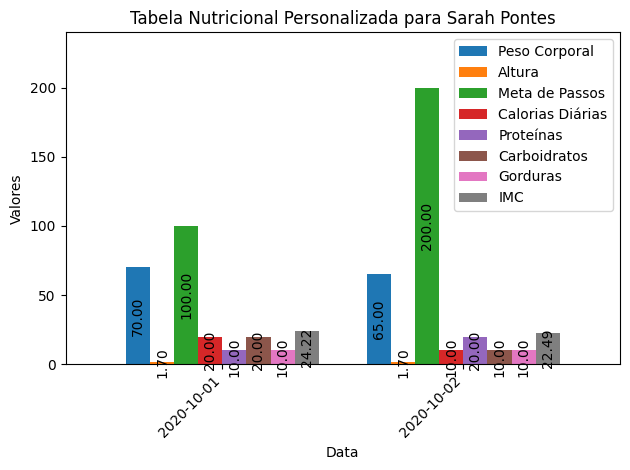


Tabela de Variáveis:
      Data            Nome        Peso Corporal      Altura      Meta de Passos  Calorias Diárias     Proteínas     Carboidratos      Gorduras           IMC      Classificação IMC
   2020-10-01     Sarah Pontes       70.00            1.70            100               20             10.00           20.00           10.00           24.22            NORMAL     
   2020-10-02     Sarah Pontes       65.00            1.70            200               10             20.00           10.00           10.00           22.49            NORMAL     


'tabela_nutricional.xlsx'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil

# Perguntar o nome da pessoa
nome_pessoa = input("Qual é o nome da pessoa? ")

# Coletar entradas do usuário
num_entries = int(input("Quantos dias quer adicionar (apenas o número)! "))
data = []
for i in range(num_entries):
    print(f"Entrada {i + 1}:")
    data_entry = {
        'Data': input("Data (YYYY-MM-DD): "),
        'Nome': nome_pessoa,
        'Peso Corporal': float(input("Peso Corporal: (exemplo: 60.40) ")),
        'Altura': float(input("Altura (exemplo: 1.70): ")),
        'Meta de Passos': int(input("Meta de Passos: ")),
        'Calorias Diárias': int(input("Calorias Diárias: ")),
        'Proteínas': float(input("Proteínas: ")),
        'Carboidratos': float(input("Carboidratos: ")),
        'Gorduras': float(input("Gorduras: "))
    }
    # Calcular IMC
    peso = data_entry['Peso Corporal']
    altura = data_entry['Altura']
    data_entry['IMC'] = peso / (altura ** 2)

    # Classificar IMC
    imc = data_entry['IMC']
    if imc < 18.5:
        data_entry['Classificação IMC'] = 'MAGREZA'
    elif 18.5 <= imc < 25.0:
        data_entry['Classificação IMC'] = 'NORMAL'
    elif 25.0 <= imc < 30.0:
        data_entry['Classificação IMC'] = 'SOBREPESO I'
    elif 30.0 <= imc < 40.0:
        data_entry['Classificação IMC'] = 'OBESIDADE II'
    else:
        data_entry['Classificação IMC'] = 'OBESIDADE GRAVE III'

    data.append(data_entry)

# Criar DataFrame a partir dos dados coletados
df = pd.DataFrame(data)

# Exibir o DataFrame
print("\nDataFrame:")
print(df)

# Plotagem gráfica de barras
plt.figure(figsize=(20, 10))
ax = df.set_index('Data')[['Nome', 'Peso Corporal', 'Altura', 'Meta de Passos', 'Calorias Diárias', 'Proteínas', 'Carboidratos', 'Gorduras', 'IMC', 'Classificação IMC']].plot(kind='bar', width=0.8, position=0.5)
plt.title(f'Tabela Nutricional Personalizada para {nome_pessoa}')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.xticks(rotation=45, ha='right')  # Adicione o parâmetro 'ha' para alinhar os rótulos à direita
plt.tight_layout()

# Adicionar rótulos nas barras (vertical e alinhado ao centro)
for container in ax.containers:
    ax.bar_label(container, fmt='%2.2f', label_type='center', rotation=90)

# Ajustar o espaçamento entre as barras
ax.margins(y=0.2)

plt.tight_layout()

# Exibir o gráfico de barras
plt.show()

# Exibir tabela com todas as variáveis
print("\nTabela de Variáveis:")
table = df.to_string(index=False, float_format='%.2f', justify='center', col_space=15)
print(table)

# Criar o diretório se não existir
output_dir = '/content/sample_data/tabela_nutricional/'
os.makedirs(output_dir, exist_ok=True)

# Salvar DataFrame em um arquivo Excel
excel_filename = 'tabela_nutricional.xlsx'
excel_path = os.path.join(output_dir, excel_filename)
df.to_excel(excel_path, index=False)

# Mover o arquivo para a pasta
shutil.move(excel_path, excel_filename)
